In [5]:
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import visualize_dem_results as viz
import all_nu_analysis as ana

import numpy as np
from matplotlib import pyplot as plt
import pickle

In [8]:
def dem_respects_min_loci(data, plot=True):
    
    #print(data['dn_in'])

    all_loci = np.zeros((len(data['chanax']), len(data['ts_'])))
    for i in np.arange(len(data['chanax'])):
        all_loci[i,:] =  data['dn_in'][i]/data['trmatrix'][:,i]
    
    min_loci = np.min(all_loci, axis=0)
    min_loci_interp = np.interp(data['ts'],data['ts_'],min_loci)

    if plot:
        fig = plt.figure(figsize=(5, 4))
        plt.semilogy(data['ts_'], min_loci)
        plt.semilogy(data['ts'], data['DEM'])
        plt.semilogy(data['ts'], min_loci_interp)
    
        plt.xlim(5.7,7.2)
        plt.ylim(1e20,1e30)


    ahhh = np.where(data['DEM'] > min_loci_interp)[0]

    if len(ahhh) > 0:
        return False
    else:
        return True


def check_loci(key, keydict):


    violations = []
    
    #AIA ONLY FILES
    # res_files, tworegions = ana.get_key_resultfiles(key, fromhome=True, 
    #                     keydict=keydict,
    #                     withparams=False,
    #                     namesearchstring='onlyaia')

    #NO-XRT FILES
    res_files, tworegions = ana.get_key_resultfiles(key, fromhome=True, 
                        keydict=keydict,
                        withparams=False,
                        namesearchstring=key+'_no_xrt_')    

    #ALL-INSTRUMENT FILES
    # res_files, tworegions = ana.get_key_resultfiles(key, fromhome=True, 
    #                     keydict=keydict,
    #                     withparams=False,
    #                     namesearchstring=key+'_'+'MC_')
    
    if tworegions:
        for j in range(0,2):
            #label = ARDict['NOAA_ARID'][j]+'-'+key
            resfiles = res_files[j]
            for r in resfiles:
                #print(r)
                data, timestring, time = viz.load_DEM(r)
                if not dem_respects_min_loci(data, plot=False):
                    print('AHHHHHHHHHHHHHHHH')
                    violations.append(r)
                    
                

                


    else:
        for r in res_files:
            data, timestring, time = viz.load_DEM(r)
            if not dem_respects_min_loci(data, plot=False):
                    print('AHHHHHHHHHHHHHHHH')
                    violations.append(r)



    return violations
    

with open('all_targets.pickle', 'rb') as f:
    data = pickle.load(f)

keys = data.keys()
bad_eggs = []
for k in keys:
    bad_eggs.extend(check_loci(k, data))


print('')
print('')
print('Issues found with:')
print(bad_eggs)

doing  01-sep-15
01-sep-15 0 03-54-45_03-58-55 []
01-sep-15 0 03-58-55_03-59-25 []
01-sep-15 0 03-59-25_03-59-55 []
01-sep-15 0 03-59-55_04-00-25 []
01-sep-15 0 04-00-25_04-01-15 []
01-sep-15 0 04-01-15_04-04-50 []
01-sep-15 0 04-04-50_04-06-45 []
01-sep-15 0 04-06-45_04-08-50 []
01-sep-15 0 04-08-50_04-10-15 []
01-sep-15 0 04-10-15_04-13-25 []
01-sep-15 0 04-13-25_04-21-25 []
01-sep-15 0 04-21-25_04-47-40 []
01-sep-15 0 08-38-20_08-39-15 []
01-sep-15 0 08-39-15_08-42-05 []
01-sep-15 0 08-42-05_08-46-15 []
01-sep-15 0 08-46-15_08-48-35 []
01-sep-15 0 08-48-35_08-57-20 []
01-sep-15 0 08-57-20_09-02-10 []
01-sep-15 0 09-02-10_09-03-20 []
01-sep-15 0 09-03-20_09-04-00 []
01-sep-15 0 09-04-00_09-04-30 []
01-sep-15 0 09-04-30_09-05-00 []
01-sep-15 0 09-05-00_09-05-30 []
01-sep-15 0 09-05-30_09-06-00 []
01-sep-15 0 09-06-00_09-06-30 []
01-sep-15 0 09-06-30_09-07-00 []
01-sep-15 0 09-07-00_09-07-30 []
01-sep-15 0 09-07-30_09-08-00 []
01-sep-15 0 09-08-00_09-08-30 []
01-sep-15 0 09-08-30_09-09

/var/folders/55/06y21cm93w70z_8gl7yxv2t40000gq/T/ipykernel_70406/3254107177.py:7: RuntimeWarning: divide by zero encountered in divide
  all_loci[i,:] =  data['dn_in'][i]/data['trmatrix'][:,i]


doing  12-sep-17
12-sep-17 0 20-59-30_21-00-00 []
12-sep-17 0 21-00-00_21-00-30 []
doing  13-sep-17
doing  10-oct-17
10-oct-17 0 01-28-30_01-35-55 []
10-oct-17 0 01-35-55_01-38-30 []
10-oct-17 0 01-38-30_01-40-15 []
10-oct-17 0 01-40-15_01-41-15 []
10-oct-17 0 01-41-15_01-43-45 []
10-oct-17 0 01-43-45_01-46-00 []
10-oct-17 0 01-46-00_01-49-00 []
10-oct-17 0 01-49-00_01-50-45 []
10-oct-17 0 01-50-45_01-51-50 []
10-oct-17 0 01-51-50_01-53-00 []
10-oct-17 0 01-53-00_01-53-30 []
10-oct-17 0 01-53-30_01-54-00 []
10-oct-17 0 01-54-00_01-54-30 []
10-oct-17 0 01-54-30_01-55-00 []
10-oct-17 0 01-55-00_01-55-30 []
10-oct-17 0 01-55-30_01-56-00 []
10-oct-17 0 01-56-00_01-56-30 []
10-oct-17 0 01-56-30_01-57-00 []
10-oct-17 0 01-57-00_01-57-30 []
10-oct-17 0 01-57-30_01-58-00 []
10-oct-17 0 01-58-00_01-58-30 []
10-oct-17 0 01-58-30_01-59-00 []
10-oct-17 0 01-59-00_01-59-30 []
10-oct-17 0 01-59-30_02-00-00 []
10-oct-17 0 02-00-00_02-00-30 []
10-oct-17 0 02-00-30_02-01-00 []
10-oct-17 0 02-01-00_02-0

/var/folders/55/06y21cm93w70z_8gl7yxv2t40000gq/T/ipykernel_70057/2473458125.py:7: RuntimeWarning: divide by zero encountered in divide
  all_loci[i,:] =  data['dn_in'][i]/data['trmatrix'][:,i]


True

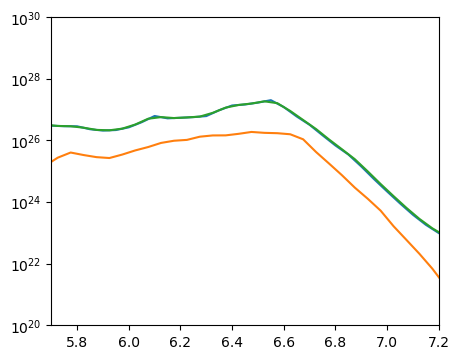

In [43]:
def dem_respects_min_loci(data, plot=True):
    
    #print(data['dn_in'])

    all_loci = np.zeros((len(data['chanax']), len(data['ts_'])))
    for i in np.arange(len(data['chanax'])):
        all_loci[i,:] =  data['dn_in'][i]/data['trmatrix'][:,i]
    
    min_loci = np.min(all_loci, axis=0)
    min_loci_interp = np.interp(data['ts'],data['ts_'],min_loci)

    if plot:
        fig = plt.figure(figsize=(5, 4))
        plt.semilogy(data['ts_'], min_loci)
        plt.semilogy(data['ts'], data['DEM'])
        plt.semilogy(data['ts'], min_loci_interp)
    
        plt.xlim(5.7,7.2)
        plt.ylim(1e20,1e30)


    ahhh = np.where(data['DEM'] > min_loci_interp)[0]

    if len(ahhh) > 0:
        return False
    else:
        return True

    
    
file = '/Users/jmdunca2/do-dem/initial_dem_26jul16_1/region_0/19-22-55_19-23-25/19-22-55_19-23-25_5.6_7.2_26-jul-16_1_MC_DEM_result.pickle'
#file = '/Users/jmdunca2/do-dem/initial_dem_26jul16_1/region_1/19-22-55_20-23-20/19-22-55_20-23-20_5.6_7.2_26-jul-16_1_MC_DEM_result.pickle'
data, timestring, time = viz.load_DEM(file)

dem_respects_min_loci(data)



In [11]:
len(data['ts'])

33